##### here first import all  required libraries 

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter

#### load the image

The type of this input is <class 'numpy.ndarray'>
Shape: (1050, 960, 3)


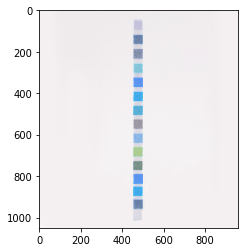

In [79]:
image = cv2.imread('image.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

#### convert image into original image

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

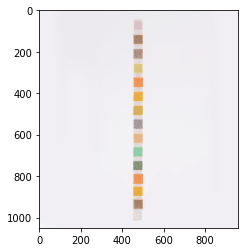

In [80]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### we will get result using KMeans 

In [81]:
image = image.reshape((image.shape[0]*image.shape[1],3))
image.shape

(1008000, 3)

top 10 colors has pixel value as:
 [[240.86613901 239.19834364 243.60927911]
 [148.3597719  205.32244686 171.54380508]
 [228.19014452 175.42051193  76.06599338]
 [222.20071415 201.95621124 193.00507423]
 [176.36284767 155.84587905 147.91630518]
 [160.81690899 138.02854066 116.00735954]
 [236.90048733 235.30885786 239.85692055]
 [240.18232605 150.71203657  92.57084815]
 [227.31010929 192.02400468 140.18169399]
 [226.90882353 217.43259141 216.52551669]]

the label given to each pixel in the image are
 [0 0 0 ... 0 0 0]

the size of the label is
 1008000
counts without sorting =  Counter({0: 792942, 6: 170933, 9: 12580, 2: 5743, 5: 5571, 3: 5321, 8: 5124, 7: 3938, 4: 3919, 1: 1929})

the number of pixel with each labels are :
 {0: 792942, 1: 1929, 2: 5743, 3: 5321, 4: 3919, 5: 5571, 6: 170933, 7: 3938, 8: 5124, 9: 12580}


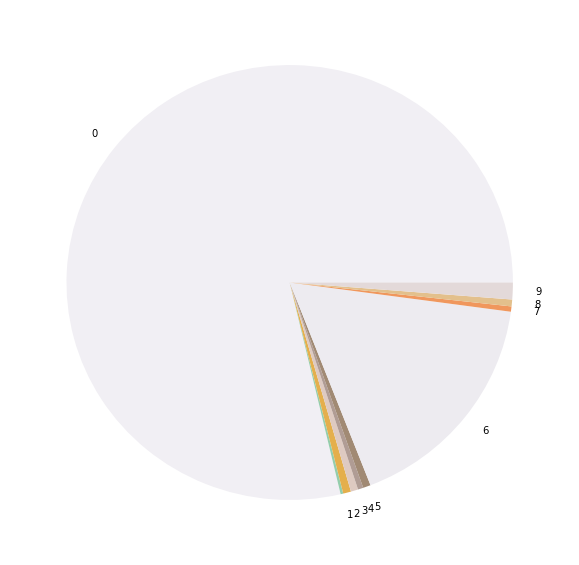

In [91]:
n_cluster = 10

kmeans = KMeans(n_cluster)
kmeans.fit(image)

colors = kmeans.cluster_centers_
labels = kmeans.labels_

print("top 10 colors has pixel value as:\n", colors)
#print("\nthe label given to each pixel in the image are\n",labels)
#print("\nthe size of the label is\n",np.size(labels))

counts = Counter(labels)
print("counts without sorting = ",counts)

counts = dict(sorted(counts.items()))
print("\nthe number of pixel with each labels are :\n", counts)

fig = plt.figure(figsize=(10,10))
plt.pie(counts.values(), labels=counts.keys(), colors=np.array(colors/255))
plt.show()